In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv('weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

C:\Users\TUSHAR GANDHI\AppData\Local\Temp\ipykernel_13600\3945773010.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'])
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Height', ylabel='Density'>

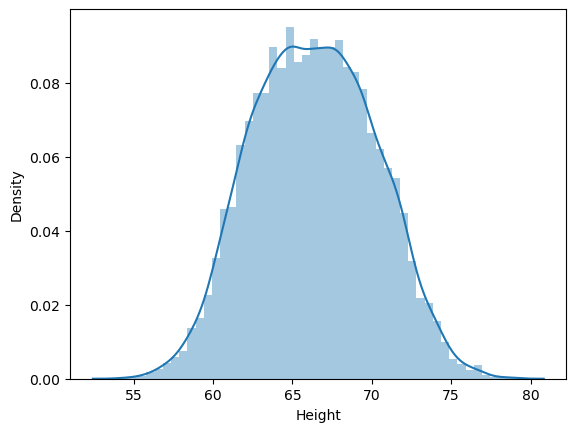

In [7]:
sns.distplot(df['Height'])

<Axes: >

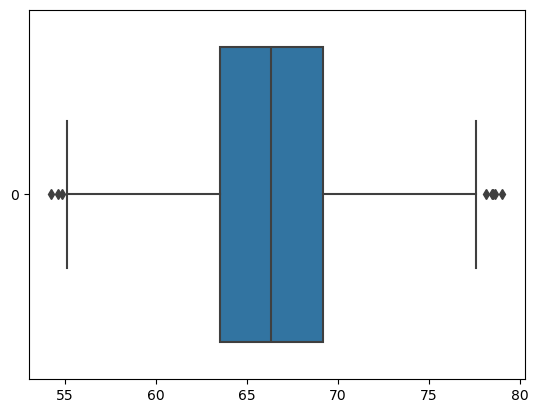

In [9]:
sns.boxplot(df['Height'],orient='h')

# 99 % ile

In [22]:
upper_limit = df['Height'].quantile(0.99)
lower_limit = df['Height'].quantile(0.01)
upper_limit,lower_limit

(73.98789201638198, 58.94801773304584)

In [15]:
outlier = df[(df['Height'] >= upper_limit) | (df['Height'] <= lower_limit)]

In [20]:
df = df[~((df['Height'] >= upper_limit) | (df['Height'] <= lower_limit))]

In [21]:
df.shape

(9800, 3)

In [23]:
df['Height'].describe()

count    9800.000000
mean       66.364366
std         3.645075
min        58.134496
25%        63.577162
50%        66.318070
75%        69.119896
max        74.785714
Name: Height, dtype: float64

C:\Users\TUSHAR GANDHI\AppData\Local\Temp\ipykernel_13600\3945773010.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'])
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Height', ylabel='Density'>

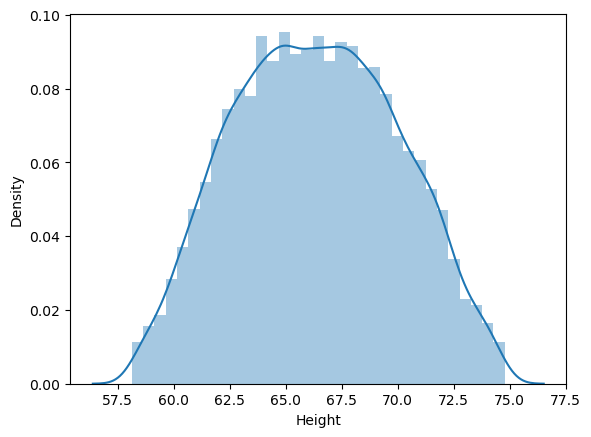

In [24]:
sns.distplot(df['Height'])

<Axes: >

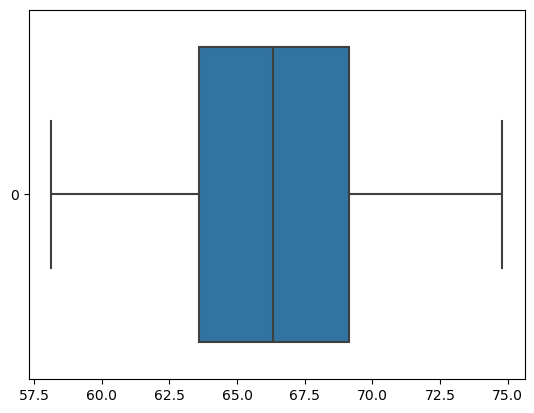

In [25]:
sns.boxplot(df['Height'],orient='h')

## Capping -> Winsorization

In [28]:
new_df = df.copy()

new_df['Height'] = np.where(
    df['Height'] > upper_limit,
    upper_limit,
    np.where(
        df['Height'] < lower_limit,
        lower_limit,
        df['Height']
    )
)

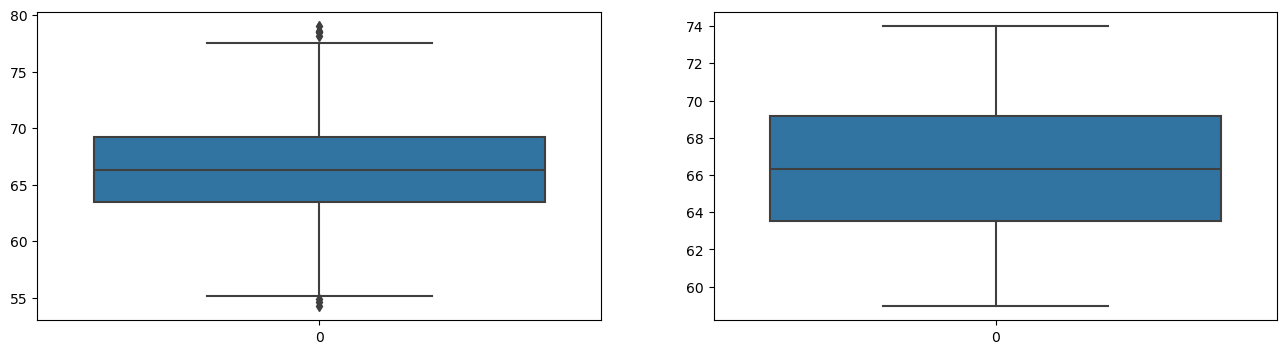

In [31]:
plt.figure(figsize=(16,4))
plt.subplot(121)
sns.boxplot(df['Height'])

plt.subplot(122)
sns.boxplot(new_df['Height'])

plt.show()